In [1]:
import numpy as np
from collections import defaultdict
import re
import matplotlib.pyplot as plt

def readTranscripts(fpath):
    with open(fpath, 'r') as f:
        fcontent = f.read()
    transcripts = re.split(r'>[ -~]*\n', fcontent)
    transcripts.pop(0)
    transcripts = [t.strip().replace('\n', '') for t in transcripts]
    return transcripts

def extractKmers(transcripts, k):
    kmers = defaultdict(int)
    transcripts = [t.upper() for t in transcripts]
    for t in transcripts:
        transcrKmers = np.array([t[i:i+k] for i in range(0, len(t)-k+1)])
        uniqueTranscrKmers = np.unique(transcrKmers, return_counts=True)
        for i in range(len(uniqueTranscrKmers[0])):
            kmers[uniqueTranscrKmers[0][i]] += uniqueTranscrKmers[1][i]
    return kmers


num transcripts: 6478
mean lenghts transcripts: 1381.066687249151
median lenghts transcripts: 1126.0


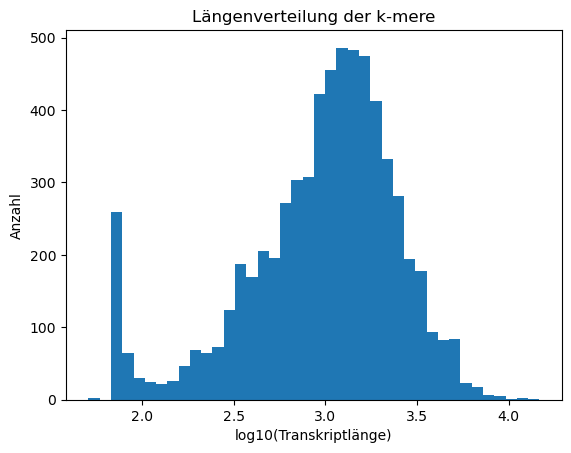

In [8]:
fpath = '../Data/Saccharomyces_RefGenome_R64/NCBI_RefSeq_Assembly/transcripts_gffread.fa'

transcripts = readTranscripts(fpath)
print(f'num transcripts: {len(transcripts)}')
lengths_transcr = [len(t) for t in transcripts]
print(f'mean lenghts transcripts: {np.mean(lengths_transcr)}')
print(f'median lenghts transcripts: {np.median(lengths_transcr)}')
log_lengths_transcr = [np.log10(l) for l in lengths_transcr]

plt.hist(log_lengths_transcr, bins=40)
plt.title('Längenverteilung der k-mere')
plt.xlabel('log10(Transkriptlänge)')
plt.ylabel('Anzahl')
plt.show()

In [3]:
kmer_counts_unique = []
kmer_counts_nonunique = []
for k in [1, 2, 3, 9, 10, 15, 20, 30]:
    print(f'k={k}')
    kmers = extractKmers(transcripts, k)

    num_unique_kmers = len(kmers)
    num_nonunique_kmers = sum(list(kmers.values()))
    kmer_counts_unique.append(num_unique_kmers)
    kmer_counts_nonunique.append(num_nonunique_kmers)


k=1


k=2
k=3
k=9
k=10
k=15
k=20
k=30


[4, 16, 64, 261492, 982725, 8180600, 8309324, 8275948]
[8946550, 8940072, 8933594, 8894726, 8888248, 8855858, 8823468, 8758688]


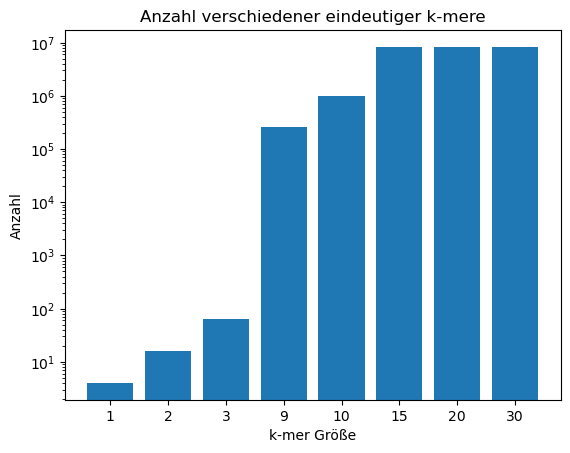

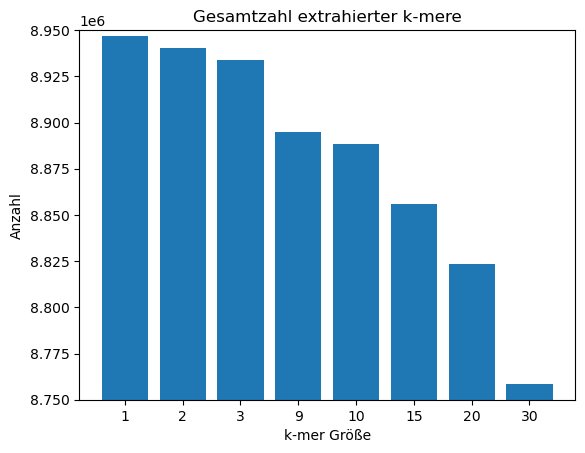

In [4]:
x = [str(i) for i in [1, 2, 3, 9, 10, 15, 20, 30]]
print(kmer_counts_unique)
print(kmer_counts_nonunique)
plt.bar(x, kmer_counts_unique)
plt.yscale('log')
plt.xlabel('k-mer Größe')
plt.ylabel('Anzahl')
plt.title('Anzahl verschiedener eindeutiger k-mere')
plt.savefig('kmer_counts_unique.png')
plt.show()
plt.bar(x, kmer_counts_nonunique)
plt.ylim(8750000, 8950000)
plt.xlabel('k-mer Größe')
plt.ylabel('Anzahl')
plt.title('Gesamtzahl extrahierter k-mere')
plt.savefig('kmer_counts_nonunique.png')
plt.show()